# 数据探测

In [1]:
import numpy as np
import os 
import time
print(os.listdir('../data/40_garbage-classify-for-pytorch'))

from os import walk

for (dirpath,dirnames,filenames) in walk('../data/40_garbage-classify-for-pytorch'):
    print('*' * 60)
    print('Director path = ',dirpath)
    print('total examples = ',len(filenames))
    print('File name Examples = ',filenames[:5])

['train', 'train.txt', 'val', 'val.txt']
************************************************************
Director path =  ../data/40_garbage-classify-for-pytorch
total examples =  2
File name Examples =  ['train.txt', 'val.txt']
************************************************************
Director path =  ../data/40_garbage-classify-for-pytorch/train
total examples =  0
File name Examples =  []
************************************************************
Director path =  ../data/40_garbage-classify-for-pytorch/train/0
total examples =  198
File name Examples =  ['img_10.jpg', 'img_100.jpg', 'img_101.jpg', 'img_102.jpg', 'img_106.jpg']
************************************************************
Director path =  ../data/40_garbage-classify-for-pytorch/train/1
total examples =  291
File name Examples =  ['img_331.jpg', 'img_332.jpg', 'img_333.jpg', 'img_335.jpg', 'img_337.jpg']
************************************************************
Director path =  ../data/40_garbage-classify-for-pyto

# 数据预处理

## 导入图像分类库

In [2]:
import torch
from torchvision import datasets,models,transforms
from matplotlib import pyplot as plt
import numpy as np
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

## 定义数据输入

In [3]:
label_dict = {
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}

In [4]:
#  数据tensor 运行方式：cpu cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device = ',device)

# 定义数据路径
TRAIN = '../data/40_garbage-classify-for-pytorch/train'
VAL = '../data/40_garbage-classify-for-pytorch/val'

print('train_path = ',TRAIN)
print('val_path = ',VAL )

device =  cpu
train_path =  ../data/40_garbage-classify-for-pytorch/train
val_path =  ../data/40_garbage-classify-for-pytorch/val


## 原始垃圾数据展示

In [5]:
train_data = datasets.ImageFolder(TRAIN)
val_data = datasets.ImageFolder(VAL)

In [6]:
train_data.imgs[:4]

[('../data/40_garbage-classify-for-pytorch/train/0/img_10.jpg', 0),
 ('../data/40_garbage-classify-for-pytorch/train/0/img_100.jpg', 0),
 ('../data/40_garbage-classify-for-pytorch/train/0/img_101.jpg', 0),
 ('../data/40_garbage-classify-for-pytorch/train/0/img_102.jpg', 0)]

train_data.imgs 中的每张图片，进行可视化展示，看看原始数据的样子

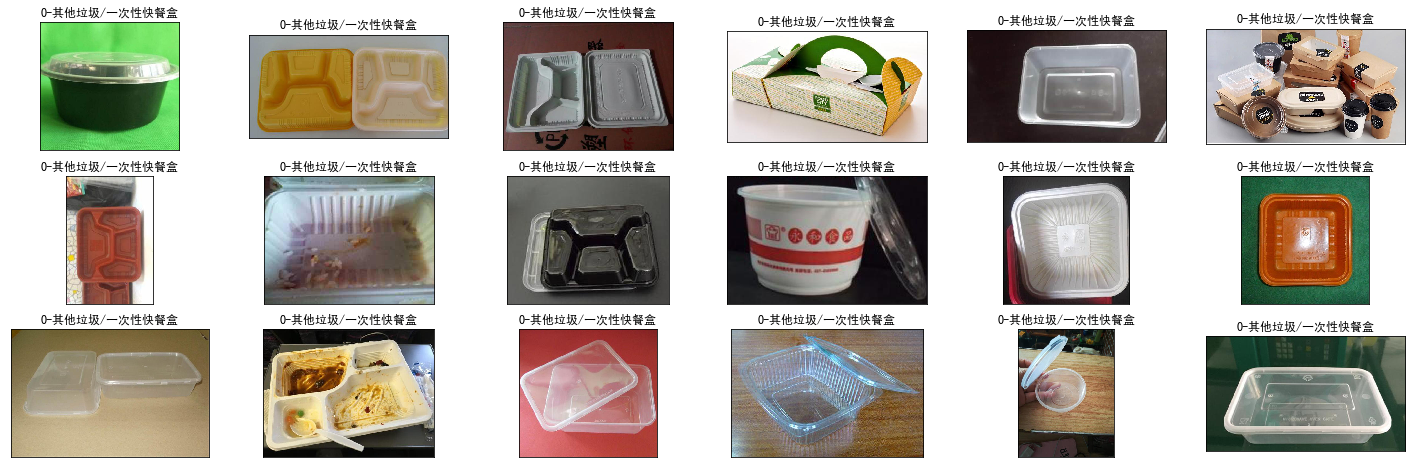

In [7]:
from PIL import Image
fig = plt.figure(figsize=(25,8))
for idx,img in enumerate(train_data.imgs[:18]):
    
    # ax 图表示例
    ax = fig.add_subplot(3,18/3,idx+1,xticks=[],yticks=[])
    file_name_path = img[0]
    target_idx = img[1]
    #print(idx,file_name_path,target_idx)
    target_name = label_dict.get(str(target_idx),"")
    # 绘制图表
    image = Image.open(file_name_path)
    plt.imshow(image)
    ax.set_title('{}-{}'.format(target_idx,target_name))

## 数据预处理过程

In [8]:
# 定义预处理方法
train_transforms = transforms.Compose([
        transforms.Resize((256, 256)), 
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
)
val_transforms = transforms.Compose([
        transforms.Resize((256, 256)), 
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
)

# 数据格式转换
print('TRAIN = ',TRAIN)
train_data = datasets.ImageFolder(TRAIN,transform=train_transforms)
val_data = datasets.ImageFolder(VAL,transform=val_transforms)

print('train_data example = ',len(train_data))
print('val_data example = ',len(val_data))

TRAIN =  ../data/40_garbage-classify-for-pytorch/train
train_data example =  11841
val_data example =  2961


那么转换后的数据格式是什么样的？ 我们重点关注imgs 和 class_to_idx 属性

In [9]:
train_data.imgs[:2]

[('../data/40_garbage-classify-for-pytorch/train/0/img_10.jpg', 0),
 ('../data/40_garbage-classify-for-pytorch/train/0/img_100.jpg', 0)]

In [10]:
print(train_data.class_to_idx)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '5': 35, '6': 36, '7': 37, '8': 38, '9': 39}


In [11]:
assert train_data.class_to_idx.keys() == val_data.class_to_idx.keys()
class_list = [str(i) for i in list(range(40))]
print(class_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']


## 数据加载

In [12]:
# 定义加载数据常量
batch_size = 32
num_workers = 2
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,
                                           num_workers=num_workers,shuffle=True)

val_loader = torch.utils.data.DataLoader(val_data,batch_size=batch_size,
                                           num_workers=num_workers,shuffle=False)


print(train_loader.dataset)
print('*' * 60)
print(val_loader.dataset)

Dataset ImageFolder
    Number of datapoints: 11841
    Root location: ../data/40_garbage-classify-for-pytorch/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
************************************************************
Dataset ImageFolder
    Number of datapoints: 2961
    Root location: ../data/40_garbage-classify-for-pytorch/val
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


# 数据展示

In [21]:
images,labels = next(iter(train_loader))

print('images.shape = ',images.shape)

images.shape =  torch.Size([32, 3, 224, 224])


In [23]:
#  取得batch_size 获取第一个图片
images[0].shape

torch.Size([3, 224, 224])

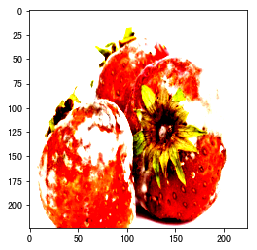

In [28]:
# 图片的展示
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
def imshow(img):
    image = img.permute(1,2,0)# 3, 224, 224-> 224, 224,3
    image = torch.clamp(image,0,1)
    plt.imshow(image)

imshow(images[0])

接下来，我们对batch_size 大小的数据进行可视化展示

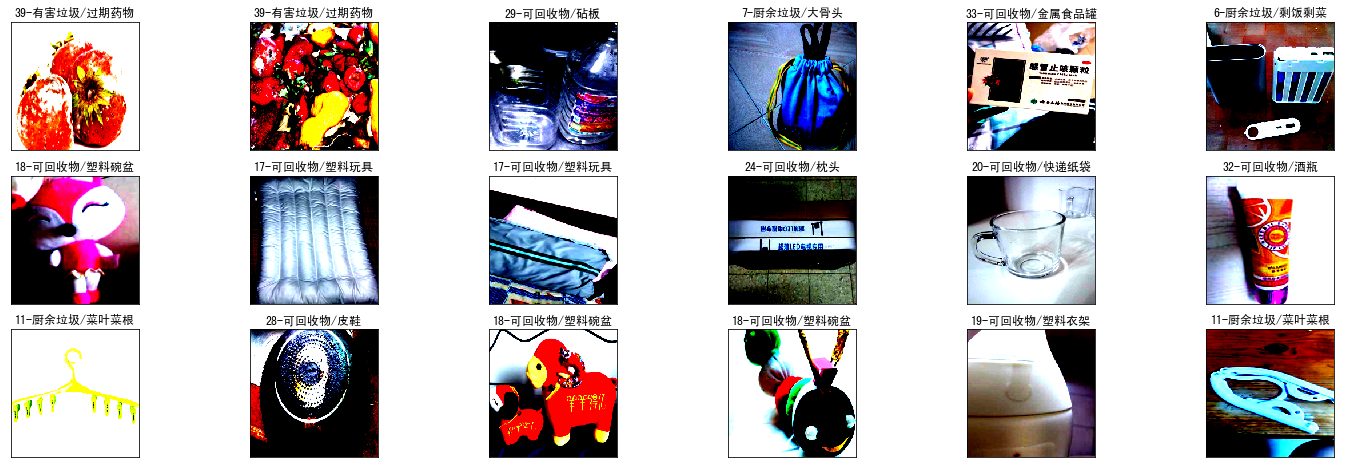

In [41]:
classes = [str(i) for i in list(range(40))]
fig = plt.figure(figsize=(25,8))

for idx in np.arange(18):
    # 生成一个图片  3*6 大小
    ax = fig.add_subplot(3,18/3,idx+1,xticks=[],yticks=[])
    
    # 展示
    imshow(images[idx])
    
    
    # 增加一些标题信息
    target_idx = classes[labels[idx]]
    target_name = label_dict[str(target_idx)]
    ax.set_title("{}-{}".format(target_idx,target_name))